# TP3 : Clustering & Word2Vec (Word Embeddings)

## Clustering

### Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

### Choix de la décennie

In [4]:
DECADE = '1960'

### Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Vérifier le nombre de fichier 
len(files)

420

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'PUBLICATION\n\nPERIODIQUE\n\nVILLE DE BRUXELLES\n\nAnnée 1960\n\nBULLETIN\nCOMMUNAL\nTOME II "\n_u\n\nImpr. H . 6 M . S C H A U M A N S\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1960\n\n\x0c\x0cN" 14\n\nCOMPTE\n\nR E N D U D E L A S E A N C E D U 1"\' A O U T\n\nVILLE\n\nDE\n\n1960\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication\n\npériodique)\n\nA n n é e 1960\n\nCONSEIL\n\nS é a n c e du\n\nPRESIDENCE\n\nCOMMUNAL\n\n1\n\ner\n\naoût\n\nDE M'

### Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

#### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

#### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 39.8 s, sys: 66 ms, total: 39.9 s
Wall time: 39.9 s


In [12]:
# Détail de la matrice
tfidf_vectors

<420x6466 sparse matrix of type '<class 'numpy.float64'>'
	with 574279 stored elements in Compressed Sparse Row format>

#### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

+considérant    0.300647
fer             0.228639
curage          0.207466
dma             0.153796
art             0.147675
                  ...   
engagé          0.000000
engager         0.000000
engagements     0.000000
engage          0.000000
™               0.000000
Length: 6466, dtype: float64

#### Tests sur nos documents

In [14]:
tfidf_array = tfidf_vectors.toarray()

In [15]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.02359086, ..., 0.01398357, 0.00888238,
       0.        ])

In [16]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.00633553, ..., 0.01408279, 0.        ,
       0.        ])

In [17]:
cosine(tfidf_array[0], tfidf_array[1])

0.45731736240865606

### Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

#### Définir un nombre de clusters

In [18]:
N_CLUSTERS = 3

#### Instancier le modèle K-Means et ses arguments

In [19]:
km_model = KMeans(n_clusters=N_CLUSTERS)

#### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [20]:
clusters = km_model.fit_predict(tfidf_vectors)

In [21]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [22]:
pprint(dict(clustering))

{0: ['Bxl_1963_Tome_II1_Part_6.txt',
     'Bxl_1963_Tome_II1_Part_8.txt',
     'Bxl_1963_Tome_II1_Part_9.txt',
     'Bxl_1963_Tome_II2_Part_2.txt',
     'Bxl_1963_Tome_II2_Part_3.txt',
     'Bxl_1963_Tome_II2_Part_4.txt',
     'Bxl_1963_Tome_II2_Part_5.txt',
     'Bxl_1963_Tome_II2_Part_8.txt',
     'Bxl_1963_Tome_II2_Part_9.txt',
     'Bxl_1964_Tome_II1_Part_4.txt',
     'Bxl_1964_Tome_II1_Part_6.txt',
     'Bxl_1964_Tome_II1_Part_8.txt',
     'Bxl_1964_Tome_II1_Part_9.txt',
     'Bxl_1964_Tome_II2_Part_1.txt',
     'Bxl_1964_Tome_II2_Part_2.txt',
     'Bxl_1964_Tome_II2_Part_3.txt',
     'Bxl_1964_Tome_II2_Part_6.txt',
     'Bxl_1964_Tome_II2_Part_7.txt',
     'Bxl_1964_Tome_II2_Part_9.txt',
     'Bxl_1964_Tome_I_Part_11.txt',
     'Bxl_1964_Tome_I_Part_12.txt',
     'Bxl_1964_Tome_I_Part_9.txt',
     'Bxl_1965_Tome_II1_Part_1.txt',
     'Bxl_1965_Tome_II1_Part_2.txt',
     'Bxl_1965_Tome_II1_Part_3.txt',
     'Bxl_1965_Tome_II1_Part_5.txt',
     'Bxl_1965_Tome_II1_Part_7.txt',
     

### Visualiser les clusters

#### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA

In [23]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [24]:
reduced_vectors[:10]

array([[-0.38270898, -0.30286121],
       [-0.46021466, -0.36438714],
       [-0.04160136,  0.07744966],
       [-0.42760839, -0.33990866],
       [-0.23793954, -0.10349267],
       [-0.10847611, -0.04634284],
       [-0.26295743, -0.19856182],
       [-0.3096473 , -0.15192998],
       [-0.08372415, -0.01570238],
       [-0.09278889,  0.02178909]])

#### Générer le plot

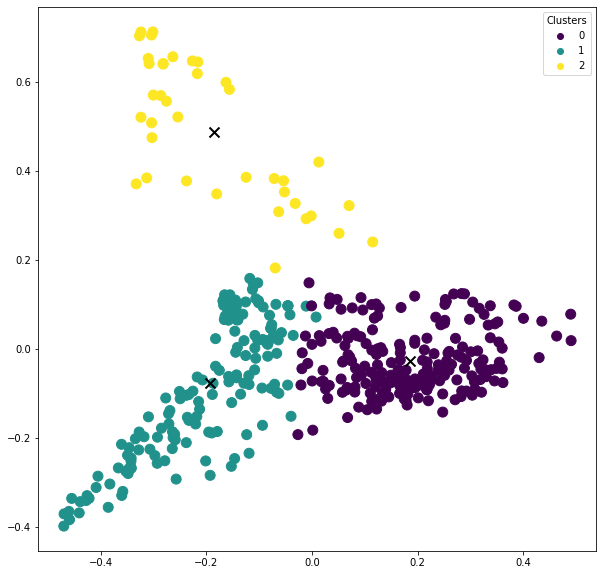

In [25]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### Vérifier la pertinence d'un des clusters (Cluster 0)

#### Imports

In [26]:
import os
import yake

In [27]:
# Création d'une liste de mots à ignorer parce qu'ils sont trop généraux étant donné notre corpus
ignored = set(["conseil communal", "conseil général", "bruxelles", "ville", "d'une",
               "mais", "faire", "c'est", "qu'il", "dit", "voir", "d'un", "l'on", 
               "n'est", "serait", "mot", "j'ai", "pris", "suite"])
ignored

{'bruxelles',
 "c'est",
 'conseil communal',
 'conseil général',
 "d'un",
 "d'une",
 'dit',
 'faire',
 "j'ai",
 "l'on",
 'mais',
 'mot',
 "n'est",
 'pris',
 "qu'il",
 'serait',
 'suite',
 'ville',
 'voir'}

In [28]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [29]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [30]:
# Prendre 5 fichiers au hasard du Cluster 0
bxl_cl0_1 = [f for f in files if f.startswith('Bxl_1963_Tome_II1_Part_6.txt')]
bxl_cl0_2 = [f for f in files if f.startswith('Bxl_1964_Tome_II1_Part_8.txt')]
bxl_cl0_3 = [f for f in files if f.startswith('Bxl_1965_Tome_I_Part_10.txt')]
bxl_cl0_4 = [f for f in files if f.startswith('Bxl_1966_Tome_II2_Part_4.txt')]
bxl_cl0_5 = [f for f in files if f.startswith('Bxl_1969_Tome_II2_Part_9.txt')]

In [31]:
#Mots clés pour le premier fichier
for f in sorted(bxl_cl0_1):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1963_Tome_II1_Part_6.txt mentions these keywords: francs francs francs, van, van het, het, francs francs, francs, dat, art, rue, plan, die, voor, district, novembre, van het perceel, exercice, crédit, een, van openbare, verhoging van het, dépense, november, collège, communal, van het arbeidsloon, service, question, dienstjaar, aan, van openbare onderstand, uitmakende van het, l'éclairage, van elewijckstraat, crédit communal, avons, voor het, ook van het, publique, van annulering van, rues, crois, restrictions, niet...


In [32]:
#Mots clés pour le deuxième fichier
for f in sorted(bxl_cl0_2):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1964_Tome_II1_Part_8.txt mentions these keywords: van, van het, van een, het, een, verhoging van het, art, tijdelijke vergunningen van, vergunningen van, voor het, begraafplaats van, voor, van het tarief, het bouwen van, der, van het indexcijfer, stijging van het, het gebied van, door het, deze van een, het tarief van, van het gebied, van deze, worden, begraafplaats van een, het einde van, voorwaarden van het, van een tijdelijke, aan het, prijs van, vergunning van, het collège van, deze van, van brussel, een vergunning van, van deze vergunningen, van het vijftiende, vergunningen, begraafplaats van brussel, prijs van een, door, aan, einde van het, begraafplaats, van het krediet, jaar, afmetingen van het, van lichamen van, zijn, van het omhulsel...


In [33]:
#Mots clés pour le troisième fichier
for f in sorted(bxl_cl0_3):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1965_Tome_I_Part_10.txt mentions these keywords: van, dépenses ontvangsten uitgaven, budget, recettes dépenses ontvangsten, begroting, van het, ontvangsten, recettes, het, dépenses, uitgaven, recettes dépenses, ontvangsten uitgaven, compte, ontvangsten dépenses uitgaven, dépenses recettes dépenses, recettes ontvangsten, dépenses ontvangsten, uitgaven ontvangsten uitgaven, dépenses uitgaven, juni, budget droits constatés, uitgaven van het, rekening, allocations budgétaires dépenses, budgétaires dépenses engagées, recettes ontvangsten dépenses, begroting vastgestelde rechten, der, uitgaven recettes ontvangsten, recettes dépenses recettes, juin, dépenses uitgaven ontvangsten, van het personeel, dépenses uitgaven recettes, recettes dépenses uitgaven, budget begroting budget, articles budgétaires begrotingsartikelen, budgétaires dépenses, budget droits, naar het volgend, begroting van deze, begroting budget begroting, budgétaires begrotingsartikelen, voor, raming van, insuffisance, naar

In [34]:
#Mots clés pour le quatrième fichier
for f in sorted(bxl_cl0_4):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1966_Tome_II2_Part_4.txt mentions these keywords: budget, communes, fonds, recettes, travaux, décembre, publique, taxe, millions, dépenses, december, d'assistance publique, charges, budgets communaux, van, budget ordinaire, budgets, chapitre, taux, fonds des communes, service, majoration, taxes, commission d'assistance publique, compte, commune, rapport, budget initial, projet de budget, communal, recette, circulaire, avances, budget extraordinaire, services, part, crédit, chapitre majoration, l'etat, fonds d'aide, solde, quote-part, l'exercice, projet, charges sociales, additionnels, augmentation, d'assistance, service ordinaire...


In [35]:
#Mots clés pour le cinquième fichier
for f in sorted(bxl_cl0_5):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1969_Tome_II2_Part_9.txt mentions these keywords: l'echevin, crois, l'echevin vanden boeynants, crois qu'il, conseil, van, monsieur l'echevin, monsieur, monsieur le bourgmestre, plan, crois qu'il serait, bourgmestre, crois qu'il faut, monsieur van geyt, l'echevin vanden, qu'il faut, van geyt, intercommunaux de bruxelles, communal, faut, transports intercommunaux, travaux publics, rue, avez, collège, travaux, décembre, transports, december, l'echevin van leynseele, part, plans, l'echevin van, parce, c'est qu'il faut, voudrais, geyt, politique, problème, commission, monsieur van...


## Word Embeddings : le modèle Word2Vec

### Imports

In [36]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

### Création du document .txt sur lequel nous allons appliquer le modèle Word2vec

In [37]:
# J'ai crée un dossier "part", qui contient uniquement la moitié des bulletins 
#(sinon corpus trop gros voir rapport)

#### Création du fichier 'corpus' contenu la moitié des bulletins

In [38]:
cat ../data/part/*.txt > ../data/partall.txt

#### Imports pour le sentence_tokenizer

In [39]:
import os
import sys
import nltk
from nltk.tokenize import sent_tokenize

#### Fichiers d'inputs et d'outputs

In [40]:
infile = "../data/partall.txt"
outfile = "../data/partsents.txt"

#### Segmentation en phrases du corpus complet et création d'un nouveau fichier

In [41]:
LIMIT = 1000000

In [42]:
with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 10000 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")
print("Done")

processing line 0/1000000
processing line 10000/1000000
processing line 20000/1000000
processing line 30000/1000000
processing line 40000/1000000
processing line 50000/1000000
processing line 60000/1000000
processing line 70000/1000000
processing line 80000/1000000
processing line 90000/1000000
processing line 100000/1000000
processing line 110000/1000000
processing line 120000/1000000
processing line 130000/1000000
processing line 140000/1000000
processing line 150000/1000000
processing line 160000/1000000
processing line 170000/1000000
processing line 180000/1000000
processing line 190000/1000000
processing line 200000/1000000
processing line 210000/1000000
processing line 220000/1000000
processing line 230000/1000000
processing line 240000/1000000
processing line 250000/1000000
processing line 260000/1000000
processing line 270000/1000000
processing line 280000/1000000
processing line 290000/1000000
processing line 300000/1000000
processing line 310000/1000000
processing line 320000

### Chargement et traitement des phrases du corpus

In [43]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [44]:
infile = f"../data/partsents.txt"
sentences = MySentences(infile)

#### Détection des bigrams

In [45]:
bigram_phrases = Phrases(sentences)

In [46]:
type(bigram_phrases.vocab)

dict

In [47]:
len(bigram_phrases.vocab.keys())

815775

In [48]:
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

taxes_communale


In [49]:
bigram_phrases.vocab[key_]

2

#### Conversion des `Phrases` en objet `Phraser

In [50]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

#### Extraction des trigrams

In [51]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [52]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

#### Création d'un corpus d'unigrams, bigrams, trigrams

In [53]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [54]:
print(corpus[:100])

[['v', 'i', 'l', 'l', 'e', 'de'], ['bruxelles'], ['bulletin', 'ires', '8eanas'], ['dl', '!'], ['conseil'], ['communal'], ['annee'], ['1847', '.'], ['au'], ['ville', 'de', 'b', 'r', 'u', 'x', 'e', 'l', 'l', 'e', 's', '.'], ['bulletin'], ['conseil'], ['aes'], ['seances'], ['communal', '.'], ['annee'], ['1847', '.'], ['bruxelles', ','], ['imprimerie'], ['d', 'e', 'j', '.'], ['h', '.', 'b', 'r', 'i', 'a', 'r', 'd', ','], ['rite', 'n', 'e', 'u', 'v', 'e', ',', '3', '1', ',', 'faubourg', 'de', 'n', 'a', 'm', 'u', 'r', ','], ['1', '84', '8'], ['de', '!'], ['du', 'consei'], ['dibi'], ['e', '.', '-', 'communication'], ['conclusions', 'de', 'la', 'section', 'des'], ['du', 'nouvel_hospice', 'pour', 'les', 'av'], ['enraisonde', 'l', "'", 'absence', '&'], ['maladie', '.', 'le', 'conseil', 'ajourne'], ['leurs', 'de', 'pierre', 'el', 'marchai'], ['cles', 'des', 'taxes', 'communale', "'"], ['bieniaance', 'eldeseianv'], ['il', 'est', 'donne', 'communie', ';'], ['mandant', 'le', 'o', 'p', 'fa'], ['gnant

### Entrainement d'un modèle Word2Vec sur ce corpus

In [55]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: user 23.2 s, sys: 372 ms, total: 23.6 s
Wall time: 10.4 s


#### Sauver le modèle dans un fichier

In [56]:
outfile = f"../data/bulletins.model"
model.save(outfile)

### Explorer le modèle

#### Charger le modèle en mémoire

In [91]:
model = Word2Vec.load("../data/bulletins.model")

#### Imprimer le vecteur d'un terme

In [92]:
model.wv["donation"]

array([-0.51400054, -0.7852662 ,  0.20527366,  1.9761126 , -1.5391157 ,
       -1.4224699 , -0.68296033,  0.18888101, -0.4468326 ,  0.0665018 ,
        0.50137794, -0.0764216 ,  0.9407485 ,  2.0516307 , -2.2922595 ,
       -2.0702538 , -1.3402478 ,  2.9000683 , -2.6253662 , -2.6922581 ,
        1.6740671 , -2.0200276 ,  0.00596834, -1.0667936 ,  1.0752506 ,
       -1.6638734 , -1.321216  , -0.37735382, -1.5954959 ,  0.44619954,
        0.09329283, -0.5072037 ], dtype=float32)

#### Calculer la similarité entre deux termes

In [93]:
model.wv.similarity("donation", "subside")

0.51982427

In [94]:
model.wv.similarity("voiture", "rue")

0.3201508

In [95]:
model.wv.similarity("credit", "seances")

-0.027349122

#### Chercher les mots les plus proches d'un terme donné

In [96]:
model.wv.most_similar("subside", topn=10)

[('credit', 0.8445886373519897),
 ('subside_annuel', 0.8286020159721375),
 ('capital', 0.8035529255867004),
 ('supplement', 0.7971983551979065),
 ('subside_extraordinaire', 0.7622889876365662),
 ('revenu', 0.7512121200561523),
 ('deficit', 0.7494440078735352),
 ('cautionnement', 0.7218759059906006),
 ('paiement', 0.7189198136329651),
 ('remboursement', 0.7149187326431274)]

In [97]:
model.wv.most_similar("voiture", topn=5)

[('troupe', 0.8448762893676758),
 ('charrette', 0.8415501713752747),
 ('loge', 0.8379366397857666),
 ('course', 0.8012893199920654),
 ('femme', 0.7935577034950256)]

In [100]:
model.wv.most_similar("proprietaire", topn=20)

[('locataire', 0.8800477385520935),
 ('cure', 0.7963093519210815),
 ('cadran', 0.7699291110038757),
 ('sieur', 0.7511746883392334),
 ('territoire', 0.7487349510192871),
 ('monument', 0.7446672916412354),
 ('reservoir', 0.73872309923172),
 ('bateau', 0.736244797706604),
 ('siege', 0.7352380752563477),
 ('cimetiere', 0.7327523231506348),
 ('debiteur', 0.7316040992736816),
 ('cocher', 0.730647087097168),
 ('pauvre', 0.7219700217247009),
 ('boulanger', 0.7173818945884705),
 ('presbytere', 0.7149595618247986),
 ('directeur', 0.7131938934326172),
 ('dommage', 0.7102891802787781),
 ('pere', 0.7077099680900574),
 ('defunt', 0.7053878307342529),
 ('centre', 0.7016199231147766)]